<a href="https://colab.research.google.com/github/JaTrev/masterThesis/blob/master/SentenceTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')



#testing this edit

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AGAcRKSAE3hPFA4CDnN8tGBfR9Rzclj0tpr1yK_0KEUySi3yzRH16A
Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Unsupervised Topic and Aspect Modelling on Massive Video Transcriptions from YouTube/data

import pickle
 
with open("savedData.txt", "rb") as myFile:
    all_data = pickle.load(myFile)

data = all_data['train']['text']
print(len(data))
data.extend(all_data['devel']['text'])
print(len(data))
data.extend(all_data['test']['text'])
print(len(data))


/content/gdrive/My Drive/Unsupervised Topic and Aspect Modelling on Massive Video Transcriptions from YouTube/data
4207
5542
6802


Preprocessing

In [ ]:
!pip3 install symspellpy
!pip3 install stop_words

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

     |████████████████████████████████| 2.6MB 6.4MB/s 
  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32916 sha256=6189630448675290067d10c4e16a870f5ffa700b6aa3c24ac72a22c0a45a49d0
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from stop_words import get_stop_words

en_stop = get_stop_words('en')
# remove stop words
en_stop.append('let')

en_stop.append('gon')
en_stop.append('dhe')
en_stop.extend(['car', 'like', 'got', 
                   'get', 'one', 'well', 
                   'back', 'bit', 'drive', 
                   'look', 'see', 'good', 
                   'quite', 'think', 'little', 
                   'right', 'know', 'thing', 'want'])
    

def preprocess_sentence(docs:list) -> list:
  if not(isinstance(docs, list)):
    raise Exception("'docs' must me a list!")
  
  else:
    if not(isinstance(docs[0], str)):
      raise Exception("Each doc must be a string!")

    processed_sentences = []
    for doc in docs:
      d = doc.lower()

      sentences = d.split(" . ")

      for sentence in sentences:

        # check if sentence is just 1 word
        if len(sentence.split()) > 1:
          processed_sentences.append(sentence)
  
  return processed_sentences


def preprocess_tokenize(docs:list, return_vocab=False) -> list:

  processed_docs = []
  vocabulary = []
  for doc in docs:
    
    tkns = word_tokenize(doc)

    # remove all tokens that are >= 3
    tkns = [w for w in tkns if len(w) > 2]

    # remove stop words
    tkns = [w for w in tkns if w not in en_stop]
    tkns = [w for w in tkns if w not in ["\'re", "n\'t", 
                                         "n\'t", "'ve", "really"]]

    # remove all tokens that are just digits
    tkns = [w for w in tkns if w.isalpha()]

    # lemmatizing
    tkns = [WordNetLemmatizer().lemmatize(w) for w in tkns]

    # stemming
    #tkns = [PorterStemmer().stem(w) for w in tkns]

    # remove all words that are not nouns
    tkns = [w for (w, pos) in nltk.pos_tag(tkns) if pos in ['NN',
                                                            'NNP', 
                                                            'NNS']]
    
    processed_docs.append(tkns)
    vocabulary.extend(tkns)

  if return_vocab:
    return processed_docs, list(set(vocabulary))
  else:
    return processed_docs
  


def preprocessing_sentences(docs:list, return_vocab=False) -> (list, list, set):

  sentences_docs = []
  sentences_tkns = []
  vocabulary = []
  for doc in docs:

    d = doc.lower()

    sentences = d.split(" . ")

    for sentence in sentences:
      # check if sentence is just 3 words
      if len(sentence.split()) <= 3:
        continue

      sentences_docs.append(sentence)
      tkns = word_tokenize(sentence)

      sentences_tkns.append(tkns)

      # remove all tokens that are >= 3
      tkns = [w for w in tkns if len(w) > 2]

      # remove stop words
      tkns = [w for w in tkns if w not in en_stop]
      tkns = [w for w in tkns if w not in ["\'re", "n\'t", 
                                            "n\'t", "'ve", "really"]]

      # remove all tokens that are just digits
      tkns = [w for w in tkns if w.isalpha()]

      # lemmatizing
      tkns = [WordNetLemmatizer().lemmatize(w) for w in tkns]

        # stemming
        #tkns = [PorterStemmer().stem(w) for w in tkns]

      # remove all words that are not nouns
      tkns = [w for (w, pos) in nltk.pos_tag(tkns) if pos in ['NN',
                                                                'NNP', 
                                                              'NNS']]
      # add words to vocabulary
      vocabulary.extend(tkns)

  if return_vocab:
    return sentences_docs, sentences_tkns, list(set(vocabulary))
  else:
    return sentences_docs, sentences_tkns

In [ ]:
sentence_data = [[] for _ in range(5)]
for doc in data:
  d = doc.lower()

  sentences = d.split(" . ")

  for sentence in sentences:
    # check if sentence is just 1 word
    if len(sentence.split()) <= 1:
      sentence_data[0].append(sentence)
    elif len(sentence.split()) <= 2:
      sentence_data[1].append(sentence)
    elif len(sentence.split()) <= 3:
      sentence_data[2].append(sentence)
    elif len(sentence.split()) <= 4:
      sentence_data[3].append(sentence)
    elif len(sentence.split()) <= 5:
      sentence_data[4].append(sentence)

    

In [ ]:
print(len(sentence_data[0]))
print(sentence_data[0])
print(len(sentence_data[1]))
print(sentence_data[1])
print(len(sentence_data[2]))
print(sentence_data[2])
print(len(sentence_data[3]))
print(sentence_data[3])
print(len(sentence_data[4]))
print(sentence_data[4])

In [ ]:
from gensim import corpora

#docs_tkns, vocab = preprocess_tokenize(data, return_vocab=True)
#docs_sentences = preprocess_sentence(data)

sentences_docs, sentences_tkns, vocab = preprocessing_sentences(data,
                                                                True)


In [ ]:
from collections import Counter
sentence_len = list(map(lambda x: len(x), sentences_docs))


fig = plt.figure(figsize=(19, 10), dpi=80)
plt.style.use('ggplot')
plt.hist(sentence_len, bins=list(set(sentence_len)))
plt.show()

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vec_tfidf = tfidf.fit_transform(docs_sentences)

BERT Model



In [ ]:
!pip3 install sentence_transformers


from sentence_transformers import SentenceTransformer
import numpy as np

In [ ]:
# vectorization the documents

model = SentenceTransformer('bert-base-nli-mean-tokens')
#distilbert-base-nli-mean-tokens
model = model.to('cuda')

In [ ]:
sentence_embeddings = model.encode(sentences_docs, 
                                   show_progress_bar=True, 
                                   convert_to_tensor=True)



LDA_BERT

In [ ]:
import gensim
import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#corpora_dict = corpora.Dictionary(docs_tkns)
#corpus = [corpora_dict.doc2bow(doc_tkns) for doc_tkns in docs_tkns]

In [ ]:
class Autoencoder:
    """
    Autoencoder for learning latent space representation
    architecture simplified for only one hidden layer
    """

    def __init__(self, latent_dim=32, activation='relu', epochs=200, batch_size=128):
        self.latent_dim = latent_dim
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
        self.his = None

    def _compile(self, input_dim):
        """
        compile the computational graph
        """
        input_vec = Input(shape=(input_dim,))
        encoded = Dense(self.latent_dim, activation=self.activation)(input_vec)
        decoded = Dense(input_dim, activation=self.activation)(encoded)
        self.autoencoder = Model(input_vec, decoded)
        self.encoder = Model(input_vec, encoded)
        encoded_input = Input(shape=(self.latent_dim,))
        decoder_layer = self.autoencoder.layers[-1]
        self.decoder = Model(encoded_input, self.autoencoder.layers[-1](encoded_input))
        self.autoencoder.compile(optimizer='adam', loss=keras.losses.mean_squared_error)

    def fit(self, X):
        if not self.autoencoder:
            self._compile(X.shape[1])
        X_train, X_test = train_test_split(X)
        self.his = self.autoencoder.fit(X_train, X_train,
                                        epochs=200,
                                        batch_size=128,
                                        shuffle=True,
                                        validation_data=(X_test, X_test), verbose=0)

In [ ]:
# LDA
ldamodel = gensim.models.ldamodel.LdaModel(
    corpus, num_topics=10, id2word=corpora_dict, passes=20)

n_doc = len(corpus)
vec_lda = np.zeros((n_doc, 10))
for i in range(n_doc):
  # get the distribution for the i-th document in corpus
  for topic, prob in ldamodel.get_document_topics(corpus[i]):
    vec_lda[i, topic] = prob


# BERT

gamma = 15
vec_ldabert = np.c_[vec_lda * gamma, vec_bert]

autoencoder = Autoencoder()
autoencoder.fit(vec_ldabert)

vec_lda_bert = autoencoder.encoder.predict(vec_ldabert)

KMeans

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [ ]:
#kmeans_model = KMeans(n_clusters = 10, random_state=42)
#result = kmeans_model.fit(vec_bert)

agglo_model = AgglomerativeClustering(n_clusters=10)
labels = agglo_model.fit_predict(sentence_embeddings.cpu())

In [ ]:
print("done")

done


In [ ]:
import gensim
from collections import Counter
from operator import itemgetter

def getWordCount(docs:list):

  temp = []
  for doc in docs:
    temp.extend(doc)

  return Counter(temp)

def getClusterWords(sentences_cleaned:list, n_concept:int,
                    vocab:set, corpus_tfidf:list, doc_labels:list):

  
  word_counts = getWordCount(sentences_cleaned)


  # group all words in the vocab by clusters
  cluster_words = [[] for i in range(n_concept)]


  for sent_id, sentence in enumerate(sentences_cleaned):
    cluster_words[doc_labels[sent_id]].extend([w for w in sentence 
                                                if w in vocab])

  # calculate absolute frequency * idf for cluster_words:
  cluster_words_freq = [[] for i in range(n_concept)]
  for cluster_id, cluster_list in enumerate(cluster_words):

    # remove any duplicates
    cluster_list = list(set(cluster_list))

    for w in cluster_list:
      w_absolute_count = word_counts.get(w)
      w_idf = corpus_tfidf.obj.idfs[dictionary.token2id[w]]
      cluster_words_freq[cluster_id].append([w, w_absolute_count * w_idf])


  # sort each word by their absolute frequency
  cluster_words_sorted = [[] for i in range(n_concept)]
  for cluster_id, cluster_list in enumerate(cluster_words_freq):
    

    sorted_list = sorted(cluster_list, key= lambda x: x[1], reverse=True)
    cluster_words_sorted[cluster_id].extend(list(set(map(
        itemgetter(0), sorted_list ))))
  
  return cluster_words_sorted

In [ ]:
dictionary = corpora.Dictionary(sentences_tkns)
dictionary.filter_extremes(no_below=25, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in sentences_tkns]

tfidf = gensim.models.TfidfModel(corpus, id2word=dictionary.id2token)
corpus_tfidf = tfidf[corpus]

In [ ]:
vocab_new = set(dictionary.values()) & set(vocab)

topic_words = getClusterWords(sentences_tkns, 10, vocab_new, corpus_tfidf,labels)

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

docs_sentences_tkns = [word_tokenize(doc) for doc in sentences_docs]

cm = CoherenceModel(topics=topic_words, 
                    texts=docs_sentences_tkns, 
                    corpus=corpus_tfidf, 
                    dictionary=dictionary,
                    coherence='c_v',
                    topn=10
                    )


Big Loop

In [ ]:
!pip3 install sentence_transformers


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import gensim

# vectorization the documents
model = SentenceTransformer('bert-base-nli-mean-tokens')
#distilbert-base-nli-mean-tokens
model = model.to('cuda')

sentence_embeddings = model.encode(sentences_docs, 
                                   show_progress_bar=True, 
                                   convert_to_tensor=True)

In [ ]:
model.encode()

torch.Size([24709, 768])

In [ ]:
# create dictionary and corpus for coherence score
dictionary = corpora.Dictionary(sentences_tkns)
dictionary.filter_extremes(no_below=25, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in sentences_tkns]

tfidf = gensim.models.TfidfModel(corpus, id2word=dictionary.id2token)
corpus_tfidf = tfidf[corpus]
vocab_new = set(dictionary.values()) & set(vocab)

In [ ]:
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering

top_n_words_per_topic = 10
num_cluster_range = range(2, 21, 1)

coherence_score_vNum_cluster = {'kmeans': [], 
                                'agglomerative': [], 
                                'spectral':[]}

best_labels_cm = {'kmeans': (0, 0, [], []),
                  'agglomerative': (0, 0, [], []),
                  'spectral': (0, 0, [], [])}

cluster_types = ['kmeans']


for num_cluster in num_cluster_range:
  print("num_cluster: " + str(num_cluster))

  for cluster_type in cluster_types:


    if cluster_type == 'kmeans':
      params = {'n_clusters': num_cluster, 
                'algorithm': "full", 
                'random_state': 42}
      model = KMeans(**params)

    elif cluster_type == 'agglomerative':
      params = {'n_clusters': num_cluster}
      model = AgglomerativeClustering(**params)
    
    elif cluster_type == 'spectral':
      model = SpectralClustering(n_clusters=num_cluster, 
                                 assign_labels="discretize", 
                                 random_state=42,
                                 )
    else:
      assert 0, "Wrong cluster type: " + str(cluster_type)


    labels = model.fit_predict(sentence_embeddings.cpu())
    topic_words = getClusterWords(sentences_tkns, 
                                  num_cluster, 
                                  vocab_new, 
                                  corpus_tfidf,
                                  labels)
    
    # remove topics if they are too small
    topic_too_small = list(map(lambda l:  len(l) < 5, topic_words))
    if any(topic_too_small):
      print(list(map(lambda l:  len(l), topic_words)))
      coherence_score_vNum_cluster[cluster_type].append(-1)
      continue

    docs_sentences_tkns = [word_tokenize(doc) for doc in sentences_docs]

    cm = CoherenceModel(topics=topic_words, 
                    texts=docs_sentences_tkns, 
                    corpus=corpus_tfidf, 
                    dictionary=dictionary,
                    coherence='c_v',
                    topn=top_n_words_per_topic
                    )
    cm_score = cm.get_coherence()

    coherence_score_vNum_cluster[cluster_type].append(cm_score)
    
    best_cm_score, _, _, _ = best_labels_cm[cluster_type]
    if cm_score >= best_cm_score:
      # found a better coherence score (using 'c_v')
      
      best_labels_cm[cluster_type] = (cm_score, 
                                      num_cluster, 
                                      labels, 
                                      topic_words)



num_cluster: 2
num_cluster: 3
num_cluster: 4
num_cluster: 5
num_cluster: 6
num_cluster: 7
num_cluster: 8
num_cluster: 9
num_cluster: 10
num_cluster: 11
num_cluster: 12
num_cluster: 13
num_cluster: 14
num_cluster: 15
num_cluster: 16
num_cluster: 17
num_cluster: 18
num_cluster: 19
num_cluster: 20


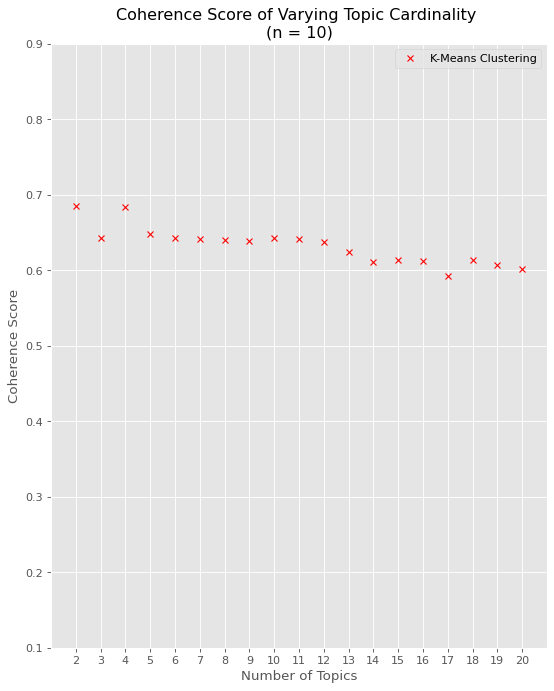

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8, 10), dpi=80)
plt.style.use('ggplot')



plt.plot(num_cluster_range, coherence_score_vNum_cluster['kmeans'], 'rx')
#plt.plot(num_cluster_range, coherence_score_embedding['agglomerative'], 'bx')
#plt.plot(num_cluster_range, coherence_score_embedding['spectral'], 'gx')

plt.ylabel('Coherence Score')
plt.xlabel('Number of Topics')
plt.legend(['K-Means Clustering'])
plt.title('Coherence Score of Varying Topic Cardinality \n'+
          '(n = 10)')
plt.xticks(list(num_cluster_range))
plt.axis([1, 21, 0.1, 0.9])
plt.show()

fig.savefig('coherencecScore_avg(bert)_c_v_10.pdf', bbox_inches='tight')


In [ ]:
print(len(coherence_score_vNum_cluster['kmeans']))

0


In [ ]:
coherence_score_vNum_cluster

{'agglomerative': [], 'kmeans': [], 'spectral': []}

Visualize

In [ ]:
import umap
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [ ]:
def visualize(model, vec, filename=None):
    """
    Visualize the result for the topic model by 2D embedding (UMAP)
    :param model: Topic_Model object
    """

    reducer = umap.UMAP()
    vec_umap = reducer.fit_transform(vec)
    print('Calculating UMAP projection. Done!')

    n = len(vec)
    lbs = model.labels_
    counter = Counter(lbs)

    for i in range(len(np.unique(lbs))):
        plt.plot(vec_umap[:, 0][lbs == i], 
                 vec_umap[:, 1][lbs == i], 
                 '.', 
                 alpha=0.5,
                 label='cluster {}: {:.2f}%'.format(i, counter[i] / n * 100))
    plt.legend()
    plt.show()
    if isinstance(filename,str):
      plt.savefig('UMAP_' + filename)

    return plt

In [ ]:
def getTSNE(n_clusters, word_labels, word_vectors: list, 
            title: str, n_components=2, perplexity=24, 
            verbose=1, random_state=42, filename=None):
  
  tsne = TSNE(n_components=n_components, perplexity=perplexity, 
              verbose=verbose, random_state=random_state)
  tsne_train_data = tsne.fit_transform(word_vectors)


  tsne_dim_1 = []
  tsne_dim_2 = []
  for c in range(0,n_clusters):
    temp_1 = []
    temp_2 = []
    for i, ind_c in enumerate(word_labels):
      if c == ind_c:
        temp_1.append(tsne_train_data[i,0])
        temp_2.append(tsne_train_data[i,1])

    tsne_dim_1.append(temp_1) 
    tsne_dim_2.append(temp_2)

  colors = cm.rainbow(np.linspace(0, 1, n_clusters))

  #Plot
  fig = plt.figure(figsize=(10, 10), dpi=80)
  plt.style.use('ggplot')

  for cluster, color in zip(range(0, n_clusters), colors):
    plt.scatter(tsne_dim_1[cluster], tsne_dim_2[cluster], color=color)

  #plt.legend()
  plt.xlabel("tsne-2d-one")
  plt.ylabel("tsne-2d-two")
  plt.title(title)

  # if filename is passed then save result as file
  if isinstance(filename,str):
    fig.savefig(filename, bbox_inches='tight')
  
  return plt, fig

[t-SNE] Computing 73 nearest neighbors...
[t-SNE] Indexed 6802 samples in 0.030s...
[t-SNE] Computed neighbors for 6802 samples in 3.297s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6802
[t-SNE] Computed conditional probabilities for sample 2000 / 6802
[t-SNE] Computed conditional probabilities for sample 3000 / 6802
[t-SNE] Computed conditional probabilities for sample 4000 / 6802
[t-SNE] Computed conditional probabilities for sample 5000 / 6802
[t-SNE] Computed conditional probabilities for sample 6000 / 6802
[t-SNE] Computed conditional probabilities for sample 6802 / 6802
[t-SNE] Mean sigma: 1.938307
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.009514
[t-SNE] KL divergence after 1000 iterations: 2.245158


(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>,
 <Figure size 800x800 with 1 Axes>)

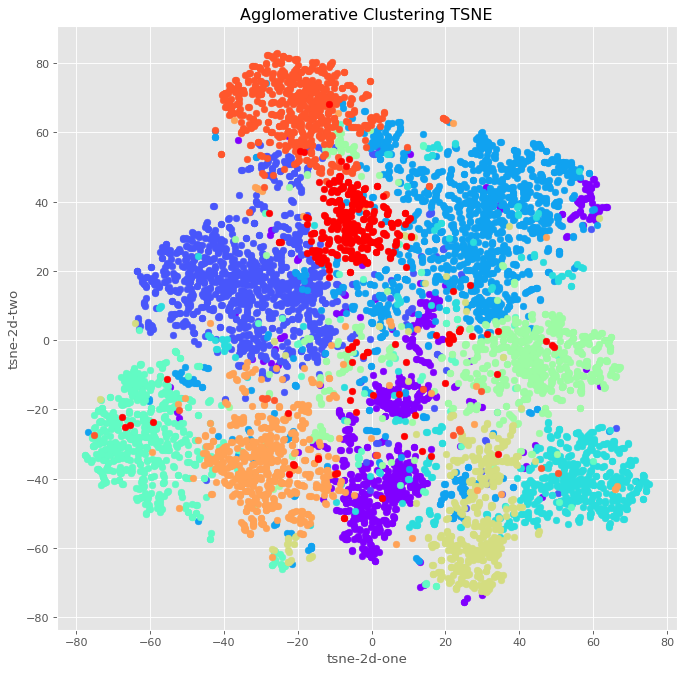

In [ ]:
getTSNE(10, agglo_model.labels_, 
        vec_lda_bert, 
        title="Agglomerative Clustering TSNE", 
        filename="BERT+lda_agglo_tsne.pdf")

In [ ]:
def get_wordcloud(model, token_lists, topic):
    """
    Get word cloud of each topic from fitted model
    :param model: Topic_Model object
    :param sentences: preprocessed sentences from docs
    """

    lbs = model.labels_
    tokens = ' '.join([' '.join(_) for _ in 
                       np.array(token_lists)[lbs == topic]])

    wordcloud = WordCloud(width=800, height=560,
                          background_color='white', collocations=False,
                          min_font_size=10).generate(tokens)

    # plot the WordCloud image
    plt.figure(figsize=(8, 5.6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

    return

Calculating UMAP projection. Done!


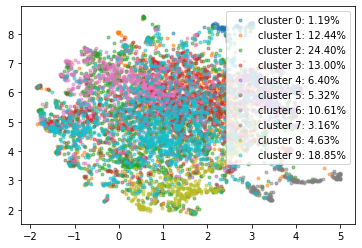

In [ ]:
visualize(kmeans_model, vec_tfidf.toarray())

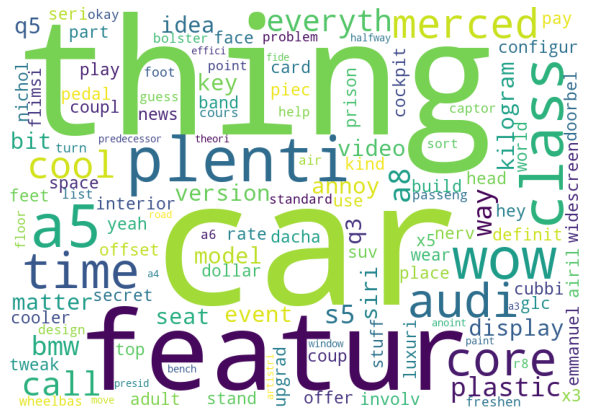

In [ ]:
get_wordcloud(kmeans_model, docs_tkns, 0)

Scores

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import silhouette_score

In [ ]:
def get_topic_words(token_lists, labels, k=None, n_words=10):
    """
    get top words within each topic from clustering results
    """
    if k is None:
        k = len(np.unique(labels))

    topics = ['' for _ in range(k)]
    for i, c in enumerate(token_lists):

        topics[labels[i]] += (' ' + ' '.join(c))

    
    word_counts = list(map(lambda x: 
                           Counter(x.split()).items(), 
                           topics))
    # get sorted word counts
    word_counts = list(map(lambda x: 
                           sorted(x, key=lambda x: x[1], reverse=True), 
                           word_counts))
    # get topics
    topics = list(map(lambda x: list(map(lambda x: x[0], x[:n_words])), 
                      word_counts))

    return topics



def get_coherence(cluster_model, token_lists, corpus, 
                  dictionary, measure='c_v', method='BERT'):
    """
    Get model coherence from gensim.models.coherencemodel
    :param model: Topic_Model object
    :param token_lists: token lists of docs
    :param topics: topics as top words
    :param measure: coherence metrics
    :return: coherence score
    """
    if method == 'LDA':
        cm = CoherenceModel(model=cluster_model, texts=token_lists, 
                            corpus=corpus, 
                            dictionary=dictionary,
                            coherence=measure)
    else:
        topics = get_topic_words(token_lists, cluster_model.labels_)
        cm = CoherenceModel(topics=topics, texts=token_lists, 
                            corpus=corpus, 
                            dictionary=dictionary,
                            coherence=measure)
    return cm.get_coherence()

def get_silhouette(cluster_model, vecs, method='BERT'):
    """
    Get silhouette score from model
    :param model: Topic_Model object
    :return: silhouette score
    """
    if method == 'LDA':
        return
    lbs = cluster_model.labels_

    return silhouette_score(vecs, lbs)

In [ ]:
get_coherence(agglo_model, docs_tkns, corpus, corpora_dict)

0.6317850410352147

In [ ]:
get_silhouette(agglo_model, vec_lda_bert)

0.122933134